In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
from nilearn.datasets import fetch_abide_pcp
# Fetch the full data and update phenotypic data and cross_validation
abide = fetch_abide_pcp(derivatives = ['func_preproc'], pipeline = 'cpac', quality_checked = True)
y = abide.phenotypic['DX_GROUP']
y[y == 2] = 0
atlas = 'GroupICA'

# Apply CanICA on the data

In [35]:
from nilearn.decomposition import CanICA
        
canica = CanICA(n_components = 20,
                memory="nilearn_cache", memory_level=2,
                verbose=10,
                mask_strategy='template',
                random_state=0)

canica.fit(abide.func_preproc)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
#canica_components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [C:\Users\xyang/nilearn_data\ABIDE_pcp\cpac\nofilt_noglobal\Pitt_0050003_func_preproc.nii.gz, C:\Users\xyang/nilearn_data\ABIDE_pcp\cpac\nofilt_noglobal\Pitt_0050004_func_preproc.nii.gz, C:\Users\xyan
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[Memory]10.0s, 0.2min   : Loading randomized_svd from nilearn_cache\joblib\sklearn\utils\extmath\randomized_svd\26763bccc6002db6f2c0c67d8317ae05
______________________________________randomized_svd cache loaded - 0.0s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


[Memory]10.8s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\6464bf5c4ac453a45c0fede8803c2ea7
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]10.8s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\421d0a543f8ba9a2aa35c8462fbf8ff5
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]10.9s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\a80cd7d15478f5083b79e1930195cd1d
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]10.9s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\13b929505ae894229f7530ef1a1a60c5
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]10.9s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\d4e37f5b9

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]11.0s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\84a91a8a773df4c108c1d51b153fe3b9
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]11.0s, 0.2min   : Loading fastica from nilearn_cache\joblib\sklearn\decomposition\_fastica\fastica\bf83aa45e1f59a62794074f7dcfd4208
_____________________________________________fastica cache loaded - 0.0s, 0.0min


In [5]:
# Each region index is stored in index_
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(canica_components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

In [6]:
# Region Extraction with Group ICA maps

In [7]:
from nilearn.connectome import ConnectivityMeasure

time_series_ICA = []

for i in range(len(abide.func_preproc)):
    print("i: " + str(i))
    # call transform from RegionExtractor object to extract timeseries signals
    subject = extractor.transform(abide.func_preproc[i])
    # saving each subject correlation to correlations
    time_series_ICA.append(subject)

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 28
i: 29
i: 30
i: 31
i: 32
i: 33
i: 34
i: 35
i: 36
i: 37
i: 38
i: 39
i: 40
i: 41
i: 42
i: 43
i: 44
i: 45
i: 46
i: 47
i: 48
i: 49
i: 50
i: 51
i: 52
i: 53
i: 54
i: 55
i: 56
i: 57
i: 58
i: 59
i: 60
i: 61
i: 62
i: 63
i: 64
i: 65
i: 66
i: 67
i: 68
i: 69
i: 70
i: 71
i: 72
i: 73
i: 74
i: 75
i: 76
i: 77
i: 78
i: 79
i: 80
i: 81
i: 82
i: 83
i: 84
i: 85
i: 86
i: 87
i: 88
i: 89
i: 90
i: 91
i: 92
i: 93
i: 94
i: 95
i: 96
i: 97
i: 98
i: 99
i: 100
i: 101
i: 102
i: 103
i: 104
i: 105
i: 106
i: 107
i: 108
i: 109
i: 110
i: 111
i: 112
i: 113
i: 114
i: 115
i: 116
i: 117
i: 118
i: 119
i: 120
i: 121
i: 122
i: 123
i: 124
i: 125
i: 126
i: 127
i: 128
i: 129
i: 130
i: 131
i: 132
i: 133
i: 134
i: 135
i: 136
i: 137
i: 138
i: 139
i: 140
i: 141
i: 142
i: 143
i: 144
i: 145
i: 146
i: 147
i: 148
i: 149
i: 150
i: 151
i: 152
i: 153
i: 154
i: 155
i: 156
i: 157
i: 1

In [8]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [9]:
correlation = 'correlation'
partial = 'partial correlation'
tangent = 'tangent'

lr = "LR"
lsvm = "LSVM"
ksvm = "kSVM"
rf = "RF"
ab = "AB"


measure = [correlation, partial, tangent]

In [10]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_corr = LogisticRegression(C = 0.01)
lr_part = LogisticRegression(C = 1)
lr_tang = LogisticRegression(C = 1)

In [11]:
# Linear SVM
from sklearn.svm import SVC

lsvm_corr = SVC(kernel='linear',C = 0.01)
lsvm_part = SVC(kernel='linear',C = 0.1)
lsvm_tang = SVC(kernel='linear',C = 0.01)

In [12]:
# Kernel SVM

ksvm_corr = SVC(gamma = 'auto', C = 100)
ksvm_part = SVC(gamma = 'auto', C = 1000)
ksvm_tang = SVC(gamma = 'auto', C = 100)

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_corr = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_part = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_tang = RandomForestClassifier(max_depth = 6, random_state = 0)

In [14]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ab_corr = AdaBoostClassifier(n_estimators = 100)
ab_part = AdaBoostClassifier(n_estimators = 100)
ab_tang = AdaBoostClassifier(n_estimators = 100)

In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

=========================================================
# Logistic Regression
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [16]:
# Correlation
from crossvalidation import CrossValidation

[X_lr_corr, lr_corr_scores] = CrossValidation(lr_corr, correlation, y, skf, time_series_ICA)
[X_lr_part, lr_part_scores] = CrossValidation(lr_part, partial,     y, skf, time_series_ICA)
[X_lr_tang, lr_tang_scores] = CrossValidation(lr_tang, tangent,     y, skf, time_series_ICA)


In [17]:
from scores import getScores
[lr_corr_acc, lr_corr_sen, lr_corr_spe] = getScores(lr_corr_scores)
[lr_part_acc, lr_part_sen, lr_part_spe] = getScores(lr_part_scores)
[lr_tant_acc, lr_tang_sen, lr_tang_spe] = getScores(lr_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

In [18]:
from roc import plotROC

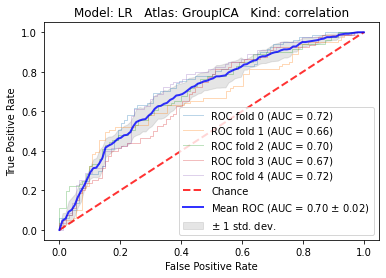

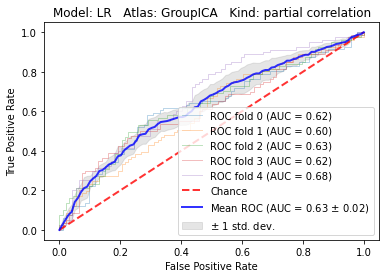

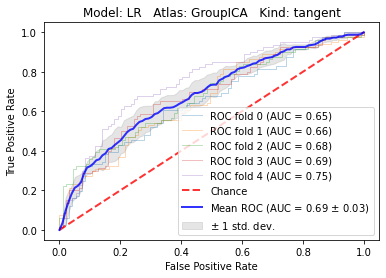

In [19]:
import matplotlib.pylab as pl

plotROC(lr_corr, X_lr_corr, y, skf, atlas, correlation, lr)
plotROC(lr_part, X_lr_part, y, skf, atlas, partial, lr)
plotROC(lr_tang, X_lr_tang, y, skf, atlas, tangent, lr)

=========================================================
# Linear SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [20]:
# Correlation
from crossvalidation import CrossValidation

[X_lsvm_corr, lsvm_corr_scores] = CrossValidation(lsvm_corr, correlation, y, skf, time_series_ICA)
[X_lsvm_part, lsvm_part_scores] = CrossValidation(lsvm_part, partial,     y, skf, time_series_ICA)
[X_lsvm_tang, lsvm_tang_scores] = CrossValidation(lsvm_tang, tangent,     y, skf, time_series_ICA)


In [21]:
from scores import getScores
[lsvm_corr_acc, lsvm_corr_sen, lsvm_corr_spe] = getScores(lsvm_corr_scores)
[lsvm_part_acc, lsvm_part_sen, lsvm_part_spe] = getScores(lsvm_part_scores)
[lsvm_tant_acc, lsvm_tang_sen, lsvm_tang_spe] = getScores(lsvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

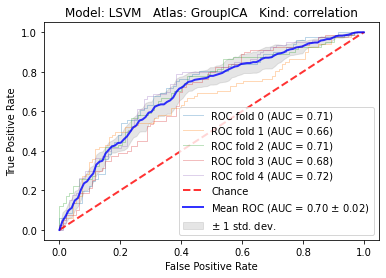

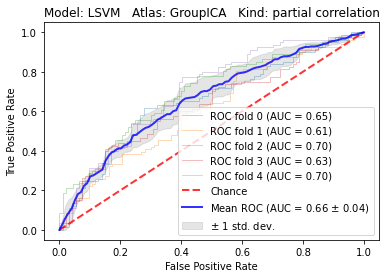

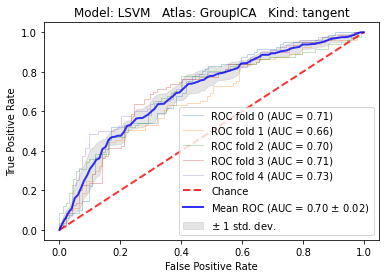

In [22]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(lsvm_corr, X_lsvm_corr, y, skf, atlas, correlation, lsvm)
plotROC(lsvm_part, X_lsvm_part, y, skf, atlas, partial, lsvm)
plotROC(lsvm_tang, X_lsvm_tang, y, skf, atlas, tangent, lsvm)

=========================================================
# Kernal SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [23]:
# Correlation
from crossvalidation import CrossValidation

[X_ksvm_corr, ksvm_corr_scores] = CrossValidation(ksvm_corr, correlation, y, skf, time_series_ICA)
[X_ksvm_part, ksvm_part_scores] = CrossValidation(ksvm_part, partial,     y, skf, time_series_ICA)
[X_ksvm_tang, ksvm_tang_scores] = CrossValidation(ksvm_tang, tangent,     y, skf, time_series_ICA)


In [24]:
from scores import getScores
[ksvm_corr_acc, ksvm_corr_sen, ksvm_corr_spe] = getScores(ksvm_corr_scores)
[ksvm_part_acc, ksvm_part_sen, ksvm_part_spe] = getScores(ksvm_part_scores)
[ksvm_tant_acc, ksvm_tang_sen, ksvm_tang_spe] = getScores(ksvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

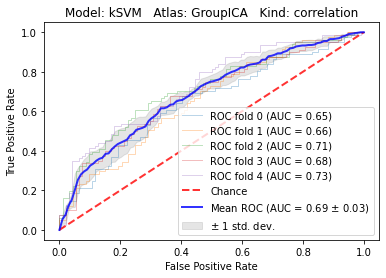

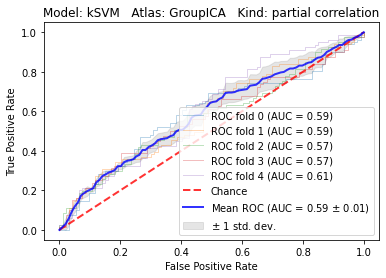

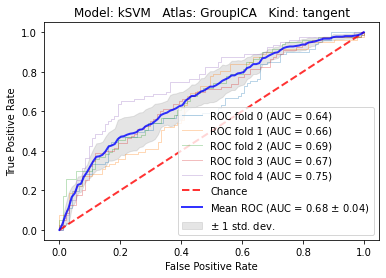

In [25]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ksvm_corr, X_ksvm_corr, y, skf, atlas, correlation, ksvm)
plotROC(ksvm_part, X_ksvm_part, y, skf, atlas, partial, ksvm)
plotROC(ksvm_tang, X_ksvm_tang, y, skf, atlas, tangent, ksvm)

=========================================================
# Random Forest
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [26]:
# Correlation
from crossvalidation import CrossValidation

[X_rf_corr, rf_corr_scores] = CrossValidation(rf_corr, correlation, y, skf, time_series_ICA)
[X_rf_part, rf_part_scores] = CrossValidation(rf_part, partial,     y, skf, time_series_ICA)
[X_rf_tang, rf_tang_scores] = CrossValidation(rf_tang, tangent,     y, skf, time_series_ICA)


In [27]:
from scores import getScores
[rf_corr_acc, rf_corr_sen, rf_corr_spe] = getScores(rf_corr_scores)
[rf_part_acc, rf_part_sen, rf_part_spe] = getScores(rf_part_scores)
[rf_tant_acc, rf_tang_sen, rf_tang_spe] = getScores(rf_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

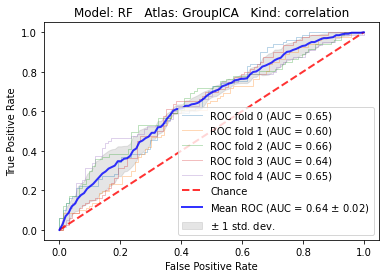

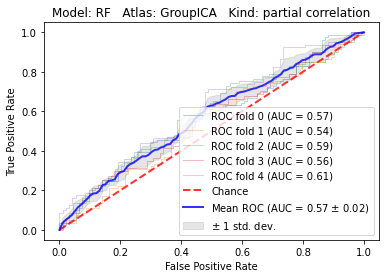

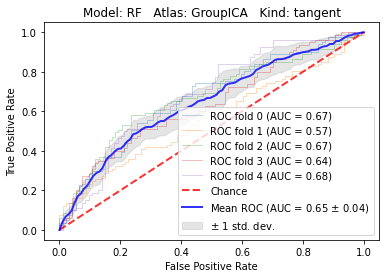

In [28]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(rf_corr, X_rf_corr, y, skf, atlas, correlation, rf)
plotROC(rf_part, X_rf_part, y, skf, atlas, partial, rf)
plotROC(rf_tang, X_rf_tang, y, skf, atlas, tangent, rf)

=========================================================
# Ada Boost
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [29]:
# Correlation
from crossvalidation import CrossValidation

[X_ab_corr, ab_corr_scores] = CrossValidation(ab_corr, correlation, y, skf, time_series_ICA)
[X_ab_part, ab_part_scores] = CrossValidation(ab_part, partial,     y, skf, time_series_ICA)
[X_ab_tang, ab_tang_scores] = CrossValidation(ab_tang, tangent,     y, skf, time_series_ICA)


In [30]:
from scores import getScores
[ab_corr_acc, ab_corr_sen, ab_corr_spe] = getScores(ab_corr_scores)
[ab_part_acc, ab_part_sen, ab_part_spe] = getScores(ab_part_scores)
[ab_tant_acc, ab_tang_sen, ab_tang_spe] = getScores(ab_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

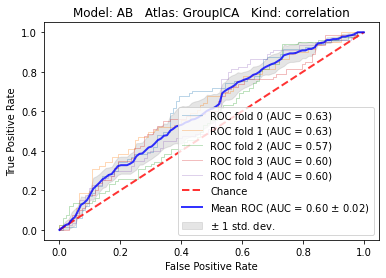

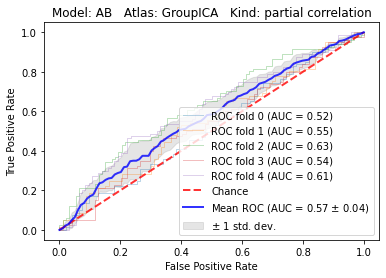

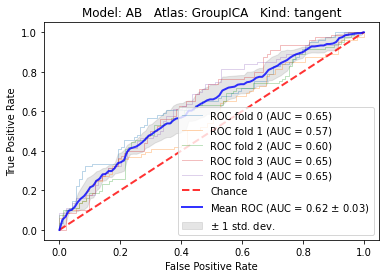

In [31]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ab_corr, X_ab_corr, y, skf, atlas, correlation, ab)
plotROC(ab_part, X_ab_part, y, skf, atlas, partial, ab)
plotROC(ab_tang, X_ab_tang, y, skf, atlas, tangent, ab)

# Summary Results

In [32]:
from IPython.display import HTML, display

test=[["","","Correlation"," "," ","Parital Corr",""," ","Tangent",""],
      
      ["Classifier","Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy"],
      
      ["LR",lr_corr_sen,lr_corr_spe,lr_corr_acc,\
       lr_part_sen,lr_part_spe,lr_part_acc,\
       lr_tang_sen,lr_tang_spe,lr_tant_acc
      ],
      
      ["lSVM",lsvm_corr_sen,lsvm_corr_spe,lsvm_corr_acc,\
       lsvm_part_sen,lsvm_part_spe,lsvm_part_acc,\
       lsvm_tang_sen,lsvm_tang_spe,lsvm_tant_acc
      ],
      
      ["kSVM",ksvm_corr_sen,ksvm_corr_spe,ksvm_corr_acc,\
       ksvm_part_sen,ksvm_part_spe,ksvm_part_acc,\
       ksvm_tang_sen,ksvm_tang_spe,ksvm_tant_acc
      ],
      
      ["RF",rf_corr_sen,rf_corr_spe,rf_corr_acc,\
       rf_part_sen,rf_part_spe,rf_part_acc,\
       rf_tang_sen,rf_tang_spe,rf_tant_acc
      ], 
      
      ["AB",ab_corr_sen,ab_corr_spe,ab_corr_acc,\
       ab_part_sen,ab_part_spe,ab_part_acc,\
       ab_tang_sen,ab_tang_spe,ab_tant_acc
      ]
     ]

print("Test:")
print("===========================================================================================")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in test))
))

Test:


,,Correlation,,,Parital Corr,,,Tangent,
Classifier,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy
LR,48.64%,78.00%,64.41%,52.86%,66.46%,60.16%,58.84%,68.36%,63.95%
lSVM,48.40%,77.36%,63.95%,52.11%,72.43%,63.03%,25.32%,90.81%,60.51%
kSVM,58.33%,69.02%,64.07%,49.64%,60.91%,55.68%,57.59%,67.93%,63.15%
RF,42.94%,76.70%,61.08%,30.04%,78.00%,55.80%,32.77%,84.62%,60.62%
AB,49.88%,62.80%,56.83%,49.64%,59.86%,55.12%,54.35%,63.45%,59.24%
